# <B>KC HOUSE DATA 

<B>Questions:</B>
<br><li>does having a waterfront contribute to higher price?
<br><li>does grade have an effect on the housing price?
<br><li>do the mean prices vary with grades?
<br><li>does condition of the house have an effect on price?
    
<br>
   
<br><li>is there multicollinearity between the features?
<br><li>what factors influence the price?

# CHECKING THE DATASET

<B>Importing necessary packages:

In [152]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import pylab as py 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
#surpresses scientific notation
pd.options.display.float_format = '{:.2f}'.format

<B>Importing the dataset:

In [154]:
#importing the dataset
df=pd.read_csv('kc_house_data.csv')

#checking through the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


# CLEANING THE DATASET

In [155]:
#checking the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [156]:
#dropping the unnessecary columns
df.drop(['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [157]:
#displaying the dataset with the changes made
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,nan,3,7,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987


In [158]:
#checking the shape
df.shape

(21597, 11)

In [159]:
#checking the info of the data and the types of each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
id             21597 non-null int64
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [160]:
#checking the statistical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


<B>FINDING NAN VALUES

In [161]:
#detecting nan values in dataframe
df.isna().values.any()

True

In [162]:
#locating where the nan values exist and the amount of nan values for each columns
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

<b>DEALING WITH NAN VALUES

In [163]:
#waterfront has 2376 nan values
#checking all unique values for waterfront
#according to the column descriptions for this data set a house can have a waterfront 
df.waterfront.unique()

array([nan,  0.,  1.])

In [164]:
#from checking the unique values in waterfront it indicates that value 1 shows houses to have a waterfront or no waterfront with value 0
#seeing that there are nan values we can make the assumption that  there is no waterfront and therefore we can replace these nan values with 0
#indicating that there is no waterfront

In [165]:
df["waterfront"] = df["waterfront"].fillna(0.0)

In [166]:
df.waterfront.unique()

array([0., 1.])

<B>DEALING WITH OULIERS AND EXTREME VALUES

In [167]:
#checking the statistical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


In [168]:
df[df['sqft_lot']==1651359.00]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1717,1020069017,700000.00,4,1.00,1300,1651359,1.00,0.00,4,6,1920


In [169]:
#from this table it can be seen that the max value for bedrooms is 33 

In [170]:
#checking the row that has 33 bedrooms
df[df['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,2402100895,640000.00,33,1.75,1620,6000,1.00,0.00,5,7,1947


In [171]:
df[df['grade']==10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
66,3394100030,975000.00,4,2.50,2720,11049,2.00,0.00,3,10,1989
75,3276920270,832500.00,4,4.00,3430,35102,2.00,0.00,4,10,1986
79,1531000030,720000.00,4,2.50,3450,39683,2.00,0.00,3,10,2002
91,5036300431,1100000.00,5,2.75,3520,6353,2.00,0.00,4,10,2001
108,1853000400,680000.00,4,2.50,3140,28037,2.00,0.00,4,10,1991
...,...,...,...,...,...,...,...,...,...,...,...
21552,524059330,1700000.00,4,3.50,3830,8963,2.00,0.00,3,10,2014
21557,8562790760,785000.00,4,3.50,3070,4684,2.00,0.00,3,10,2009
21560,9253900271,3570000.00,5,4.50,4850,10584,2.00,1.00,3,10,2007
21577,8672200110,1090000.00,5,3.75,4170,8142,2.00,0.00,3,10,2006


<B>CHECKING FOR DUPLICATES

In [172]:
#checking if there are any duplicate values
df.duplicated().any()

True

In [173]:
df.duplicated().sum()

3

In [174]:
df[df.duplicated() == True]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,1825069031,550000.00,4,1.75,2410,8447,2.00,0.00,4,8,1936
14969,6308000010,585000.00,3,2.50,2290,5089,2.00,0.00,3,9,2001
20038,8648900110,555000.00,3,2.50,1940,3211,2.00,0.00,3,8,2009


In [175]:
df.id.duplicated().sum()

177

In [176]:
df[df['id'].duplicated() == True].sort_values('id')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2495,1000102,300000.00,6,3.00,2400,9373,2.00,0.00,3,7,1991
16801,7200179,175000.00,2,1.00,840,12750,1.00,0.00,3,6,1925
11422,109200390,250000.00,3,1.75,1480,3900,1.00,0.00,4,7,1980
12406,123039336,244900.00,1,1.00,620,8261,1.00,0.00,3,5,1939
7786,251300110,358000.00,3,2.25,2510,12013,2.00,0.00,3,8,1988
...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,322000.00,3,1.75,1510,8400,1.00,0.00,2,7,1979
4918,9809000020,1940000.00,5,2.25,3120,16672,2.00,0.00,4,9,1969
6340,9828200460,430000.00,2,1.00,700,4800,1.00,0.00,3,7,1922
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [177]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15185,9834200305,350000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [178]:
#removing all the duplicate ids and keeping the second one
#duplicate ids indicate that the house has been sold more than once

In [179]:
df.drop_duplicates(subset='id', keep="last", inplace=True)

In [180]:
#
df.duplicated(subset = ['id']).sum()

0

In [181]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [182]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [183]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

# EXPLORATORY DATA ANALYSIS (EDA)

In [184]:
#checking if waterfront is a categorial variable

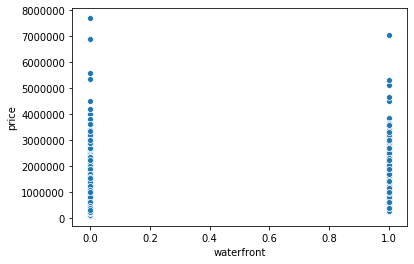

In [185]:
#graphing scatterplot
sns.scatterplot('waterfront','price',data=df)

In [186]:
#verticle lines indicate that the variables are categorical variables and are discrete

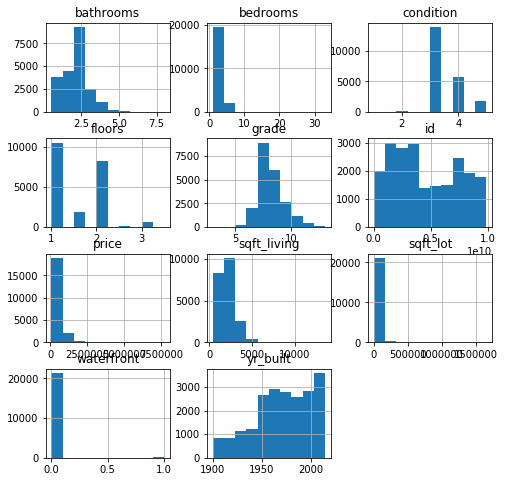

In [187]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

In [188]:
#creating dummy variables for condition?
#5 types of values in condition

Text(0.5, 1.0, 'Average Price of houses based on if they have waterfronts')

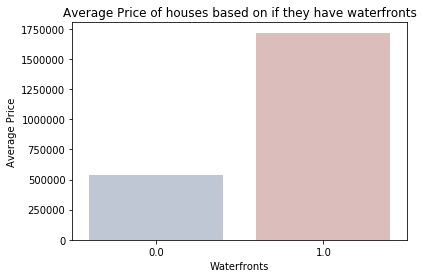

In [189]:
#graphing the average price of houses based on if they have waterfronts
type_list=list(df.waterfront.unique())
average_price2=[]

for i in type_list:
    x=df[df.waterfront==i]
    average_price2.append(sum(x.price)/len(x))
df2=pd.DataFrame({'type_list':type_list,'average_price':average_price2})

plt.figure()
ax=sns.barplot(x=df2.type_list,y=df2.average_price,palette='vlag')
plt.xlabel('Waterfronts')
plt.ylabel('Average Price')
plt.title('Average Price of houses based on if they have waterfronts')

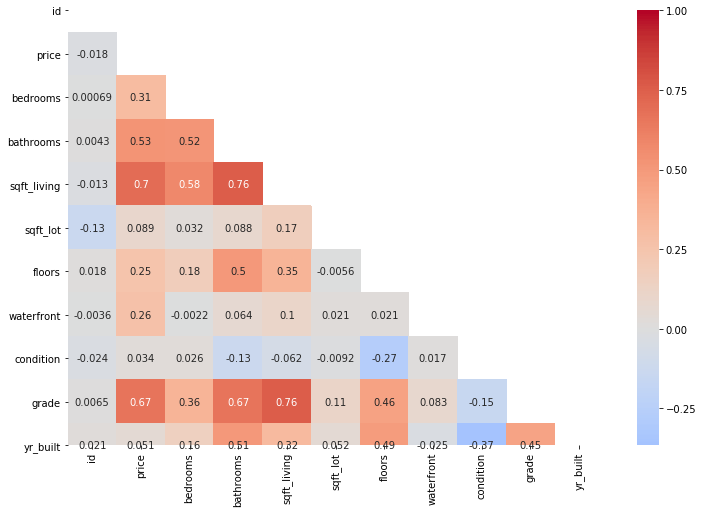

In [190]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

# TRAIN/TEST SPLIT

In [191]:
# Pre-processing
X = df.drop('price',axis=1)

y = df['price']
y = pd.DataFrame(y)

In [192]:
# check X and Y shape
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (21420, 10)
y Shape: (21420, 1)


In [193]:
base_reg = LinearRegression().fit(X, y)
base_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.00,0.00,0.00,-0.01,-0.13,0.02,-0.00,-0.02,0.01,0.02
bedrooms,0.00,1.00,0.52,0.58,0.03,0.18,-0.00,0.03,0.36,0.16
bathrooms,0.00,0.52,1.00,0.76,0.09,0.50,0.06,-0.13,0.67,0.51
sqft_living,-0.01,0.58,0.76,1.00,0.17,0.35,0.10,-0.06,0.76,0.32
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.05
floors,0.02,0.18,0.50,0.35,-0.01,1.00,0.02,-0.27,0.46,0.49
waterfront,-0.00,-0.00,0.06,0.10,0.02,0.02,1.00,0.02,0.08,-0.02
condition,-0.02,0.03,-0.13,-0.06,-0.01,-0.27,0.02,1.00,-0.15,-0.37
grade,0.01,0.36,0.67,0.76,0.11,0.46,0.08,-0.15,1.00,0.45
yr_built,0.02,0.16,0.51,0.32,0.05,0.49,-0.02,-0.37,0.45,1.00


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)
# Scaling the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [196]:
# check the shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (17136, 10)
X_test Shape: (4284, 10)
y_train Shape: (17136, 1)
y_test Shape: (4284, 1)


In [197]:
lin_reg = LinearRegression()

In [198]:
lin_reg.fit(X_train,y_train);

In [199]:
lin_reg.score(X_train,y_train)

0.644401526240164

In [200]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)

# Get predeicted values for polynomial training data to compute MSE
y_trainpred = reg_poly.predict(X_poly_train)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
print("degree %d" % 2, r2_score(y_test, y_pred))

# Transform the full data
X_poly = poly.transform(X)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

degree 2 0.6472223923949851


In [201]:
# The coefficients
print('Coefficients: \n', reg_poly.coef_)
train_mse = mean_squared_error(y_train, y_trainpred)
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_trainpred))

Coefficients: 
 [[ 2.55658726e-04  2.91491881e-04 -7.77697958e-07  1.01770234e-06
   1.52059518e-04 -4.79974206e-03 -7.93232571e-05 -9.31168826e-04
  -8.18133738e-04 -1.61958066e-03 -3.53451406e-03  1.42952056e-16
  -3.91564283e-06  8.38771643e-06 -2.06083944e-08 -1.39677687e-10
   3.24015205e-06  1.08036129e-04  4.17180086e-06  1.90746766e-05
  -2.13702364e-07  2.02386112e-06 -3.72293097e-06 -1.60706453e-03
  -2.72255937e-01 -6.82791471e-06  2.82411782e-07  3.15556813e-06
  -1.88103024e-07 -3.84490527e-03  9.73140388e-06  3.40141618e-03
   5.38127224e-01  3.66564544e-06  1.54004021e-07  3.43546992e-06
   1.82373142e-05  6.49518373e-04  4.50035657e-02 -1.56070326e-03
   2.19172573e-03  2.07848413e-04  2.17709650e-03  1.01771735e-02
   3.75906666e-02  8.64261829e-07  1.11756939e-01  2.10935102e-03
   6.32769182e-02  7.06913140e-01 -1.41751915e-03  7.27344957e-06
   1.84915326e-07  6.03596093e-06  2.27451168e-05  1.84809224e-03
   6.25173334e-08  1.39962324e-07  3.84175405e-07  1.2380963

In [202]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
13634,8029550180,4,2.50,2240,4616,2.00,0.00,3,7,2001
13631,5035300871,2,2.25,2470,7658,1.00,0.00,4,8,1954
5717,1526079026,5,3.50,3530,218472,2.00,0.00,3,7,1999
15431,4060000020,4,1.50,1580,10230,1.00,0.00,3,6,1945
17294,6072400470,4,2.50,2070,10244,1.00,0.00,3,8,1969
...,...,...,...,...,...,...,...,...,...,...
11383,8732190200,4,2.25,2490,7233,1.00,0.00,3,8,1978
12069,5288200260,2,1.75,2470,4600,1.00,0.00,4,7,1916
5432,6381500635,3,1.00,1260,6826,1.00,0.00,3,6,1944
868,3330500875,2,1.00,1320,3090,1.00,0.00,4,7,1908


# LINEAR REGRESSION

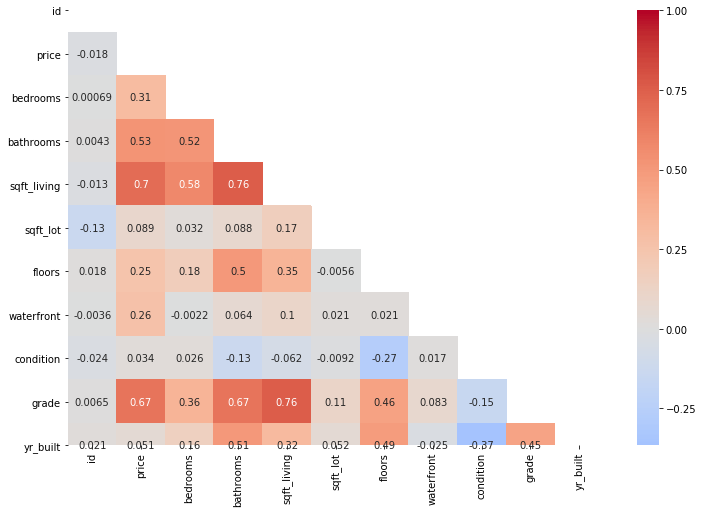

In [203]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

# INITIAL REGRESSION MODEL

In [207]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)

In [208]:
results = model.fit()

In [209]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2870.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:48:08   Log-Likelihood:            -2.3625e+05
No. Observations:               17136   AIC:                         4.725e+05
Df Residuals:                   17126   BIC:                         4.726e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
id          -1.773e-06    6.3e-07     -2.813      0.005   -3.01e-06   -5.38e-07
bedrooms    -3.414e+04   2452.141    -13.923      0.000   -3.89e+04   -2.93e+04
bathrooms   -4960.7102   3938.786     -1.259      0.208   -1.27e+04    2759.715
sqft_living   195.4307      3.931     49.718      0.000     187.726     203.136
sqft_lot       -0.3656      0.047     -7.771      0.000      -0.458      -0.273
floors      -1.986e+04   4092.404     -4.854      0.000   -2.79e+04   -1.18e+04
waterfront   7.854e+05   2.15e+04     36.585      0.000    7.43e+05    8.28e+05
condition    6.363e+04   2810.687     22.637      0.000    5.81e+04    6.91e+04
grade        1.214e+05   2576.972     47.098      0.000    1.16e+05    1.26e+05
yr_built     -431.2409     10.292    -41.902      0.000    -451.413    -411.068
==============================================================================
Omnibus:                    13111.807   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           877281.205
Skew:                           3.121   Prob(JB):                         0.00
Kurtosis:                      37.492   Cond. No.                     6.44e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
results.pvalues

id            0.00
bedrooms      0.00
bathrooms     0.21
sqft_living   0.00
sqft_lot      0.00
floors        0.00
waterfront    0.00
condition     0.00
grade         0.00
yr_built      0.00
dtype: float64

Id will be removed as a predictor as it is not statistically relevant. In addition to that bathrooms has a p-value of 0.21 which is greater than the significance level of 0.05, indicating that it is not statistically significant.

From this initial baseline model we can see that there are multiple negative coefficients indicating that there is a negative relation ship between those predictors and the target variable. Where for example a one unit increase in yr_built will lead to a -$431.24 reduction in the price whilst the other variables are held constant.

<b>Checking for multicollinearity between variables

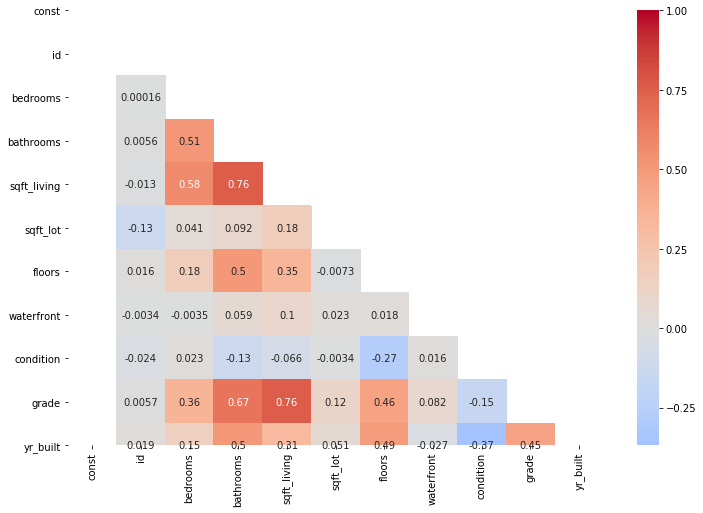

In [211]:
#correlation heatmap with predictor variables to check if they correlate with each other
plt.figure(figsize=(12,8))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

In [ ]:
#from this correlation heatmap we can see that there is a high correlation between:
#sqft_living and bathrooms at 0.76
#grade and sqft_living at 0.76
#bathrooms and grade at 0.67
#sqft_living and bedrooms at 0.58

#there is high multicollinearity

In [129]:
#removing all the columns that gave a negative coefficient
X_train.drop(['id','bedrooms','bathrooms','floors','yr_built'], axis=1, inplace=True)
X_test.drop(['id','bedrooms','bathrooms','floors','yr_built'], axis=1, inplace=True)

In [131]:
X_train.head()

,sqft_living,sqft_lot,waterfront,condition,grade
13634,2240,4616,0.00,3,7
13631,2470,7658,0.00,4,8
5717,3530,218472,0.00,3,7
15431,1580,10230,0.00,3,6
17294,2070,10244,0.00,3,8


In [132]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)

In [133]:
results = model.fit()

In [134]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                          1.952e+04
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        11:11:35   Log-Likelihood:                     -2.3763e+05
No. Observations:               17136   AIC:                                  4.753e+05
Df Residuals:                   17131   BIC:                                  4.753e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   239.2846      2.944     81.292      0.000     233.515     245.054
sqft_lot       -0.3194      0.050     -6.363      0.000      -0.418      -0.221
waterfront   8.591e+05   2.32e+04     37.075      0.000    8.14e+05    9.04e+05
condition   -2.295e+04   2304.466     -9.957      0.000   -2.75e+04   -1.84e+04
grade        1.684e+04   1496.332     11.251      0.000    1.39e+04    1.98e+04
==============================================================================
Omnibus:                    12667.962   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           610935.726
Skew:                           3.066   Prob(JB):                         0.00
Kurtosis:                      31.601   Cond. No.                     5.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
results.pvalues

sqft_living   0.00
waterfront    0.00
grade         0.00
dtype: float64

With this modified model we can see that there is a much more improved r2 value

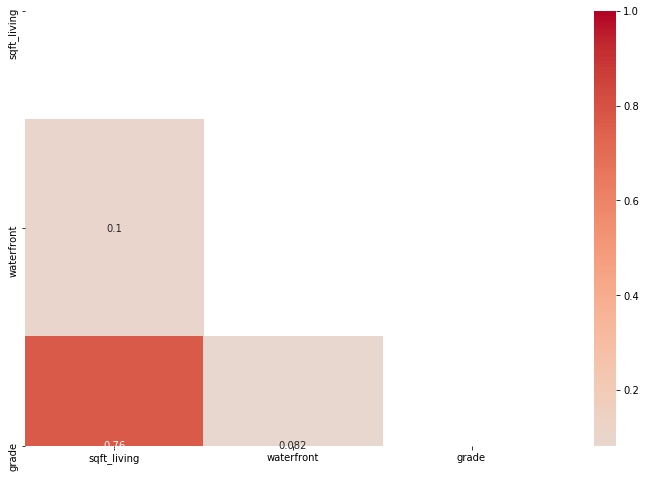

In [149]:
#correlation heatmap with predictor variables to check if they correlate with each other
plt.figure(figsize=(12,8))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

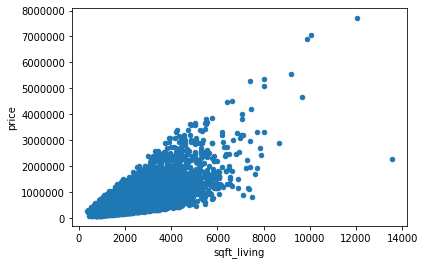

In [147]:
ax = df.plot.scatter(x='sqft_living', y='price');

In [136]:
#removing all the columns that gave a negative coefficient
X_train.drop(['sqft_lot','condition'], axis=1, inplace=True)
X_test.drop(['sqft_lot','condition'], axis=1, inplace=True)

In [137]:
X_train.head()

,sqft_living,waterfront,grade
13634,2240,0.00,7
13631,2470,0.00,8
5717,3530,0.00,7
15431,1580,0.00,6
17294,2070,0.00,8
